<div align="center" style="color:Blue;font-size:18px"> Use Ensemble method Bagging with Random Forest and compare the results to baseline linear regression model</div>

- Importing libraries and dataset

In [252]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
import reverse_geocoder as rg

In [253]:
df=pd.read_csv("DS2_C5_S6_KCHouse_Data_Practice.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


- Structure of data

In [254]:
df.shape

(21613, 21)

In [255]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [256]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Task1 : Data Preparation

- dropping id and date which are irrelevant for our modelling

In [258]:
df.drop(["id","date"],axis=1,inplace=True)

- reverse geocoding

In [259]:
l=list(zip(df["lat"],df["long"]))
f=rg.search(l)
df["location"]=[i["name"] for i in f]

In [260]:
df.drop(["lat","long"],axis=1,inplace=True)

- null value check

In [261]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
location         0
dtype: int64

- whole dataframe pairplot to have data understanding

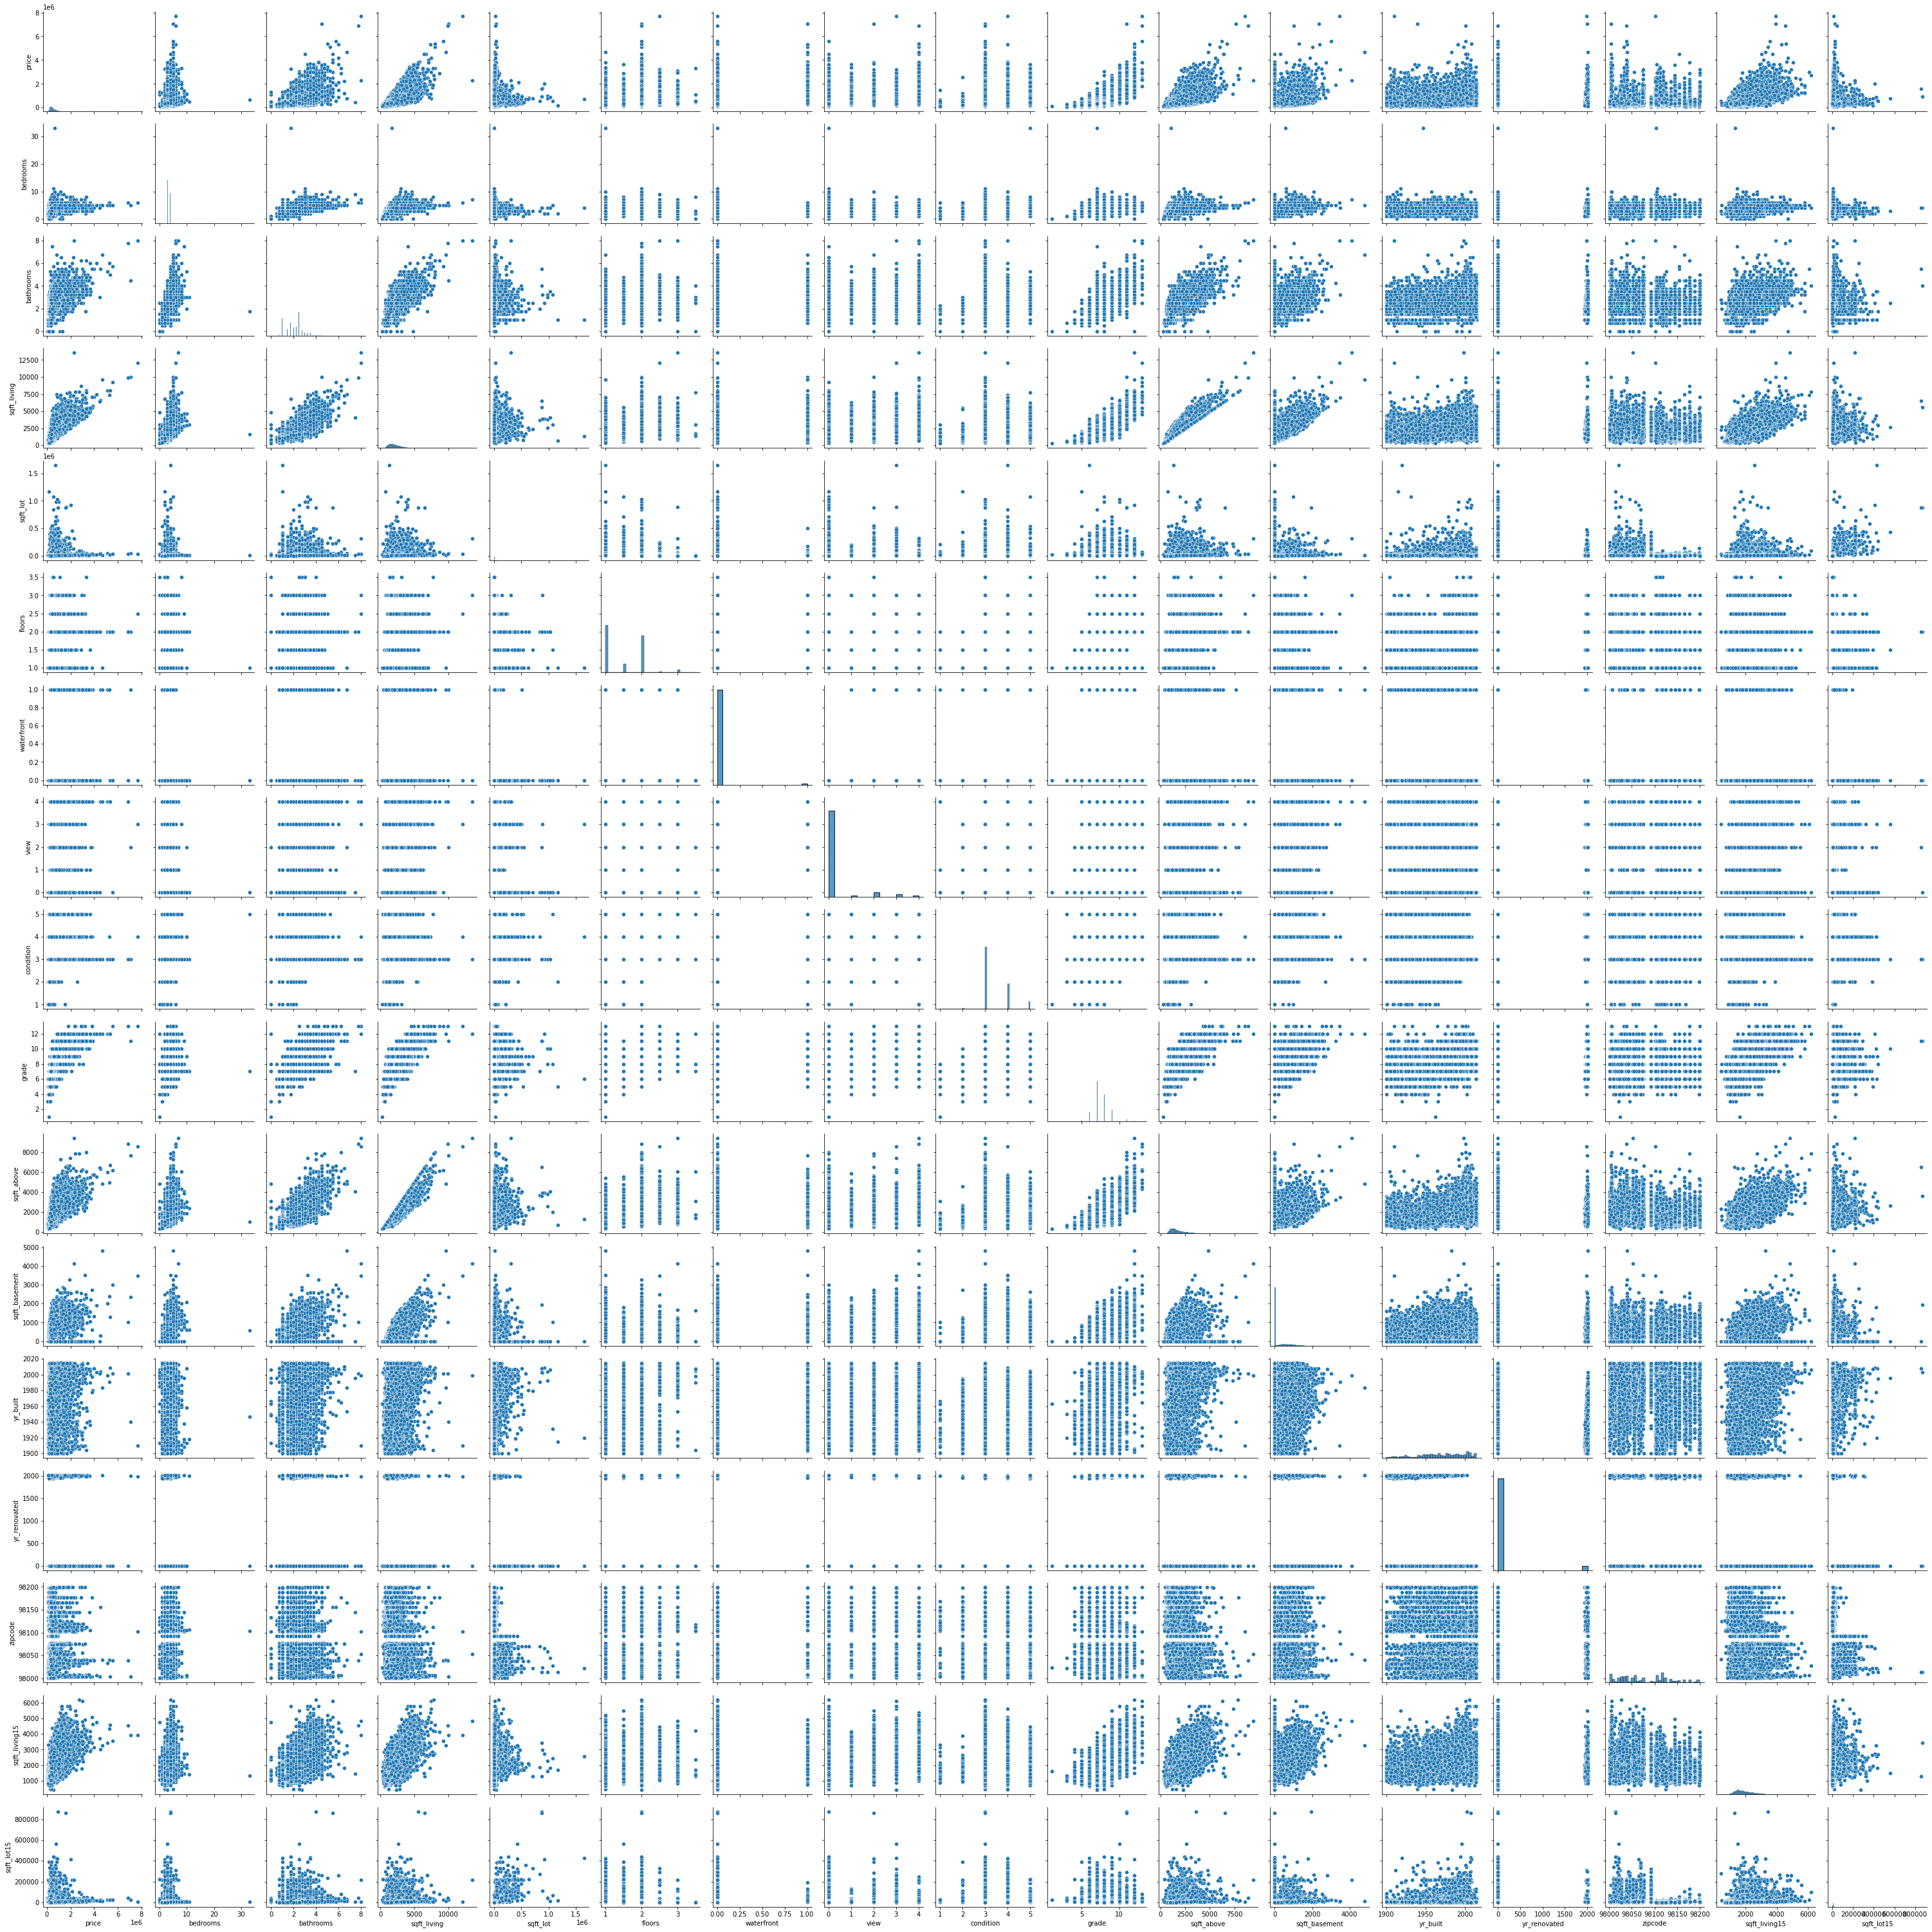

In [262]:
sns.pairplot(df)

- Label encoding location

In [119]:
df["location"]=LabelEncoder().fit_transform(df["location"])

- correlation matrix

<AxesSubplot:>

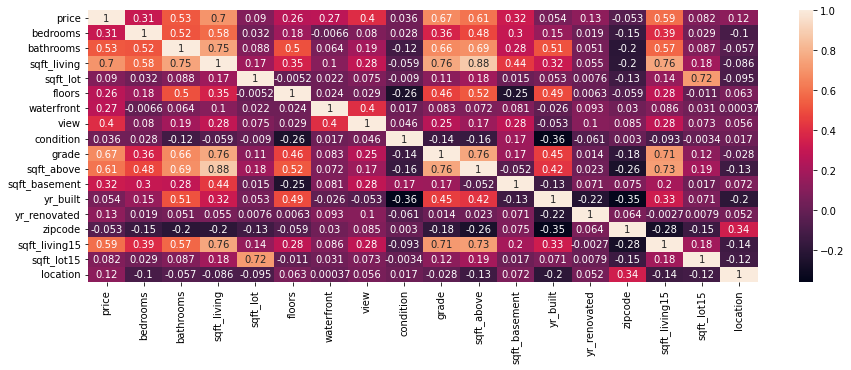

In [120]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)

- price is our target variable
- and wrt price,grade,sqft_above,sqft_living15,bathrooms are highly correlated

In [121]:
df1=df.loc[:,df.columns!="price"]

- Standard Scaling

In [122]:
scaler=StandardScaler()
y=df["price"]
df=pd.DataFrame(scaler.fit_transform(df1),columns=df1.columns)
df["price"]=y

In [123]:
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,location,price
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,1.870152,-0.943355,-0.260715,-1.633729,221900.0
1,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,0.879568,-0.432686,-0.187868,0.934417,538000.0
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,-0.933388,1.070140,-0.172375,-0.615327,180000.0
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,1.085160,-0.914174,-0.284522,1.332922,604000.0
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,-0.073636,-0.272190,-0.192849,-1.456616,510000.0


In [124]:
x=df.iloc[:,:-1]
y=df["price"]

- Train test split

In [125]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

### Task2 : Baseline Regression Model

In [232]:
model=LinearRegression().fit(x_train,y_train)

In [128]:
#train R^2
model.score(x_train,y_train)


0.6650434027171209

In [233]:
#test R^2
m1_r2=model.score(x_test,y_test)
m1_r2

0.6618617852066353

In [131]:
#slopes
model.coef_

array([-32888.28803989,  32255.10619168,  79692.3736092 ,  -1042.93890347,
         5627.28586808,  47642.2826614 ,  33515.01420522,  10955.5132926 ,
       131749.76833693,  70189.9067466 ,  34048.70395575, -94395.5431711 ,
         5831.8504381 , -10204.26210976,  17542.22590507, -11808.93987834,
        42004.62720636])

In [132]:
#y-intercept
model.intercept_

540131.8687546556

In [234]:
#y_predicted
y_pred=model.predict(x_test)

In [ ]:
#evaluation metrics:

In [235]:
#mean squared error
mse=mean_squared_error(y_test,y_pred)
mse

48815841269.80369

In [236]:
#root mean squared error
rmse=np.sqrt(mse)
rmse

220943.07246393512

In [237]:
#mean absolute error
mae=mean_absolute_error(y_test,y_pred)
mae

139258.06856602457

### Task3: Bagging with Random Forest

In [138]:
from sklearn.ensemble import RandomForestRegressor

In [148]:
## finding best parameters  using gridsearch

In [149]:
rfr=RandomForestRegressor(random_state=42,n_jobs=-1)

In [188]:
p = {
 'max_depth': [4,5,6,7,8,9],
 'min_samples_leaf': [1,2,3],
 'n_estimators': [10,25,50,100]
}

In [204]:
grid=GridSearchCV(estimator=rfr,param_grid=p,cv=4,n_jobs=-1,verbose=3,scoring="r2")

In [205]:
%%time
grid.fit(x_train,y_train)

Fitting 4 folds for each of 72 candidates, totalling 288 fits
CPU times: total: 15.1 s
Wall time: 2min 27s


GridSearchCV(cv=4, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='r2', verbose=3)

In [206]:
grid.best_score_

0.7947953871579969

In [207]:
grid.best_estimator_

RandomForestRegressor(max_depth=9, n_jobs=-1, random_state=42)

In [ ]:
#building model using best parameters

In [215]:
model=RandomForestRegressor(max_depth=9, n_jobs=-1, random_state=42).fit(x_train,y_train)

In [216]:
model.score(x_train,y_train)

0.8844433880486254

In [231]:
m2_r2=model.score(x_test,y_test)
m2_r2

0.7635383047841768

In [218]:
#evaluation metrics

In [227]:
y_pred2=model.predict(x_test)

In [228]:
#mean squared error
mse2=mean_squared_error(y_test,y_pred2)
mse2

34137154793.634483

In [229]:
#mean absolute error
mae2=mean_absolute_error(y_test,y_pred2)
mae2

105626.03475094576

In [230]:
#root mean square error
rmse2=np.sqrt(mse)
rmse2

220943.07246393512

### Task4 : Comparing baseline and ensemble model

In [239]:
ydf=pd.DataFrame({"actual":y_test,"predcited by Linear Regressor":y_pred,"predicted by Random forest":y_pred2})

In [240]:
ydf

,actual,predcited by Linear Regressor,predicted by Random forest
735,365000.0,4.916007e+05,3.867577e+05
2830,865000.0,6.592887e+05,5.549242e+05
4106,1038000.0,1.200578e+06,9.528514e+05
16218,1490000.0,1.569680e+06,1.477358e+06
19964,711000.0,7.289376e+05,7.343073e+05
...,...,...,...
12606,412000.0,5.615880e+05,4.014271e+05
14393,760000.0,6.532423e+05,5.495368e+05
6899,410500.0,3.143459e+05,3.346174e+05
85,940000.0,8.535064e+05,9.572546e+05


In [ ]:
#visualizing ytest and predicted for both the models.
#taking only 100 samples for neat visualization

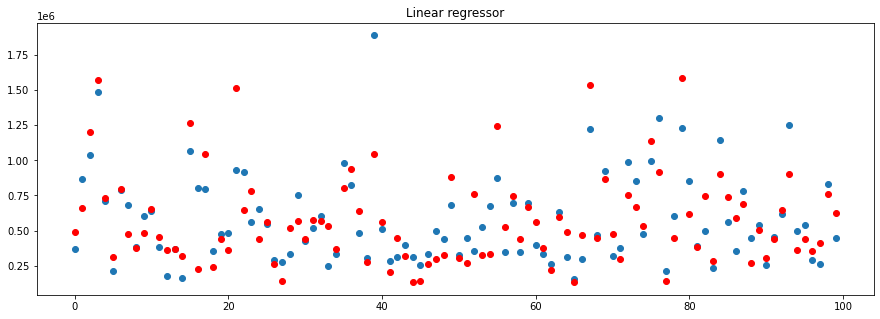

In [247]:
index=[*range(len(y_test[:100]))]
plt.figure(figsize=(15,5))
plt.title("Linear regressor")
plt.scatter(index,y_test[:100])
plt.scatter(index,y_pred[:100],color="red")

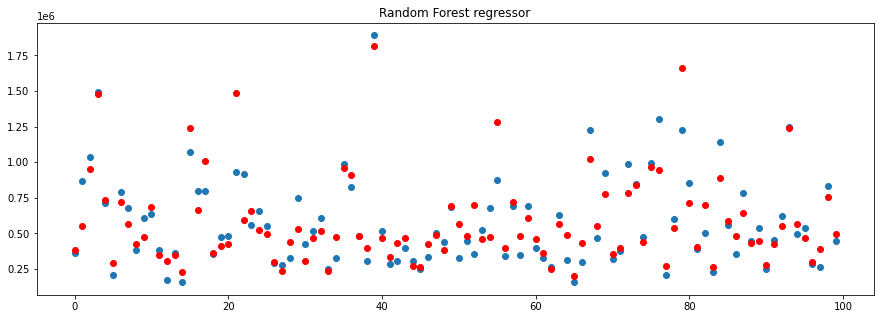

In [248]:
index=[*range(len(y_test[:100]))]
plt.figure(figsize=(15,5))
plt.title("Random Forest regressor")
plt.scatter(index,y_test[:100])
plt.scatter(index,y_pred2[:100],color="red")

In [ ]:
#random forest model has both y actual and predicted nearer than baseline one

In [241]:
metrics=pd.DataFrame({"Linear Regressor":[m1_r2,mse,rmse,mae],"Random forest regressor":[m2_r2,mse2,rmse2,mae2]},index=["R^2","MSE","RMSE","MAE"])

In [249]:
metrics

,Linear Regressor,Random forest regressor
R^2,6.618618e-01,7.635383e-01
MSE,4.881584e+10,3.413715e+10
RMSE,2.209431e+05,2.209431e+05
MAE,1.392581e+05,1.056260e+05


In [ ]:
#After ensemble modelling with random forest model is giving higher R^2 and less errors. so Random forest regressor is best than basline model